# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

`Описание проекта:` 
В данном пректе мы проведём исследование поведения клиентов перешедщих с архивных тарифов на новые тарифы и обучим модель предсказывать переход клиентов на новый тариф.  

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
%matplotlib inline

## Откройте и изучите файл

Импорт датасета

In [2]:
# импортируем дадасет
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

Выведение основной информации датасета для ознакомления

In [3]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3214 non-null   int64  
 1   calls       3214 non-null   float64
 2   minutes     3214 non-null   float64
 3   messages    3214 non-null   float64
 4   mb_used     3214 non-null   float64
 5   is_ultra    3214 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


In [4]:
# первые 
df.head(10)

,Unnamed: 0,calls,minutes,messages,mb_used,is_ultra
0,0,40.0,311.90,83.0,19915.42,0
1,1,85.0,516.75,56.0,22696.96,0
2,2,77.0,467.66,86.0,21060.45,0
3,3,106.0,745.53,81.0,8437.39,1
4,4,66.0,418.74,1.0,14502.75,0
5,5,58.0,344.56,21.0,15823.37,0
6,6,57.0,431.64,20.0,3738.90,1
7,7,15.0,132.40,6.0,21911.60,0
8,8,7.0,43.39,3.0,2538.67,1
9,9,90.0,665.41,38.0,17358.61,0


## Разбейте данные на выборки

Разбиваем датафрейм на три части в аналогии 3:1:1. Обучающая (3), Валиданионная (1), Тестовая (1).

In [5]:
# сначала разбиваем датасет на обучающую (60%) и валитационно-тестовую выборку (20% + 20%) 
# используем генератор псевдослучайного числа для случайной выборки для лучшего выявления зависимостей.
df_train, df_valid_test = train_test_split(df, test_size=.40, random_state=12345)

print('Выводим размер таблицы df_train: ', df_train.shape)

# разбиваем валитационно-тестовую выборку (20% + 20%) на валидационную и тестовую
df_valid, df_test = train_test_split(df_valid_test, test_size=.50, random_state=12345)

print('Выводим размер таблицы df_valid: ', df_valid.shape)
print('Выводим размер таблицы df_test: ', df_test.shape)


Выводим размер таблицы df_train:  (1928, 6)
Выводим размер таблицы df_valid:  (643, 6)
Выводим размер таблицы df_test:  (643, 6)


In [6]:
# создаём переменные с признаками и целевыми данными для обучающей выборки
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

# создаём переменные с признаками и целевыми данными для валидационной выборки
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

# создаём переменные с признаками и целевыми данными для тестовой выборки
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

## Исследуйте модели

Классификация при помощи дерева решений

In [7]:
# создаём переменные для выявления лучшей модели и лучшего результата
best_model = None
best_result = 0
# создаём пустые списки для добавления в них результатов качества обучающей и валидационной модели для последущего сревнения на графике
graph_val_predict = []
graph_train = []
# создаём цикл для перебора глубины дерева от 1 до 5
for depth in range(1, 6):
	# создам переменную и записываем в неё модель с перебором глубины деревьев и добавлением случайности для улучшения результата
	model = DecisionTreeClassifier(random_state=12345, max_depth= depth) 
	# обучаем модель с заданной глубиной дерева
	model.fit(features_train, target_train)
	# высчитываем предсказания модели на основе валидационной выборки
	predictions = model.predict(features_valid)
	# высчитываем предсказания модели на основе обучающей выборки чтобы впоследствии сравнить с валидационной на графике
	predictions_2 = model.predict(features_train)
	# находим качество модели сравнивая результаты валидационой выборки и результаты предсказательной модели
	result = accuracy_score(target_valid, predictions)
	# находим качество модели сравнивая результаты обучающей выборки и результаты предсказательной модели
	result_2 = accuracy_score(target_train, predictions_2)
	# добавляем значения точности для тренировочной и валидационной выборок в пустые переменные
	graph_val_predict.append(result)
	graph_train.append(result_2)
	# выводим в кажной итерации - название модели и точность предсказаний валидационной и тестовой выборок
	print(f'Model and depth number: {model:}')
	print(f'Validation accuracy: {result:.4}')
	print(f'Training accuracy: {result_2:.4}')
	print()
	# находим лучшую модель
	if result > best_result:
		best_model = model
		best_result = result
		
# выдод результатов классификации        
print(f'Доля правильных отвтов (Accuracy) лучшей Валидационной модели: {best_result:.4}')

Model and depth number: DecisionTreeClassifier(max_depth=1, random_state=12345)
Validation accuracy: 0.7543
Training accuracy: 0.7578

Model and depth number: DecisionTreeClassifier(max_depth=2, random_state=12345)
Validation accuracy: 0.7823
Training accuracy: 0.7879

Model and depth number: DecisionTreeClassifier(max_depth=3, random_state=12345)
Validation accuracy: 0.7854
Training accuracy: 0.8076

Model and depth number: DecisionTreeClassifier(max_depth=4, random_state=12345)
Validation accuracy: 0.7792
Training accuracy: 0.8107

Model and depth number: DecisionTreeClassifier(max_depth=5, random_state=12345)
Validation accuracy: 0.7823
Training accuracy: 0.8226

Доля правильных отвтов (Accuracy) лучшей Валидационной модели: 0.7854


In [8]:
# Меняем тип данных с list на Series
graph_val_predict = pd.Series(graph_val_predict)
graph_train = pd.Series(graph_train)

In [9]:
# объединяем признаки в датафрейм
dataframe = pd.concat([graph_val_predict, graph_train], axis=1)
# меняем названия колонок
dataframe.columns = ['Validative', 'Train']

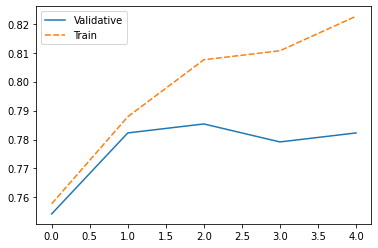

In [10]:
# выводим график с точностью обучающей и валидационной выборок.
sns.lineplot(data = dataframe)
plt.show()

Как видно на графике выше: точность обеих выборок растём до глубыны дерева равным = 2. После, заметно падение точности валидационной выборки несморя на прдолжающийся рост точности тестовой выборки.

`Вывод:` дерево решений показвло неплохой результат, >0.75 посмотри как поедут себя другие модели

Классификация при помощи случайного леса

In [11]:
# создаём переменные для выявления лучшей модели, лучшего результата
# создаём счётчики кол-ва деревьев и глубины деревьев чтобы выявить сочетание с лучшим показателем accuracy
best_model = None
best_result = 0
n_est = 0
max_depth = 0
# создаём цикл с перебором по кол-ву деревьев
for est in range(1, 101):
    # создаём вложенный цикл с перебором глубины каждого дерева
    for depth in range(1, 5):
        # создам переменную и записываем в неё модель с перебором кол-ва деревьев, 
        # глубины деревьев и добавлением случайности для улучшения результата
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # обучаем модель на тренировочной выборке
        model.fit(features_train, target_train)
        # высчитываем предсказания модели на основе валидационной выборки
        predictions = model.predict(features_valid)
        # находим качество модели сравнивая результаты валидационой выборки и результаты предсказательной модели
        result_1 = accuracy_score(target_valid, predictions)
        # находим лучшую модель, находим оптимальное кол-во деревьев и их глубину
        if result_1 > best_result:
            n_est = est
            max_depth = depth
            best_model = model
            best_result_2 = result_1

# выдод результатов классификации случайного леса
print(f'Доля правильных отвтов (Accuracy) лучшей модели: {best_result_2:.4}')
print('Количество деревьев (est):', n_est) 
print('Глубина дерева (depth):', max_depth)

Доля правильных отвтов (Accuracy) лучшей модели: 0.7916
Количество деревьев (est): 100
Глубина дерева (depth): 4


`Вывод:` случайный лес показал тоже хороший результат, >0.75 осталась последняя модель - логистическая регрессия

Классификация при помощи логистической регрессии

In [12]:
# создам переменную и записываем в неё модель логистической регрессии
# добавлением случайность для улучшения результата и максимально кол-во итераций 2000
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=2000)
# обучаю модель на тренировочной выборке
model.fit(features_train, target_train)
# находим качество модели сравнивая результаты валидационой выборки и результаты предсказательной модели
best_result_3 = model.score(features_valid, target_valid)

print(f'Доля правильных отвтов (Accuracy) лучшей модели: {best_result_3:.4}')

Доля правильных отвтов (Accuracy) лучшей модели: 0.7123


`Вывод:` логистическая регрессия показала худший результат из всех опробованных моделей, <0.75 и не удовлетваряет нашим критериям качества

### Общий вывод:

По результатам тестирования на валидационных выборках было решено использовать модель случайный лес дря работы на тестовой выборке в связи с лучшими показателями качества. Результаты распределились следующим образом:
1. Случайный лес - 0.7900 со следующими гиперпараметрами (Количество деревьев (est): 100, Глубина дерева (depth): 4 )
2. Дерево решений - 0.7854
3. Логистическая регрессия - 0.7107

## Проверьте модель на тестовой выборке

Проверяем на тестовой выборке Случайный лес который показал лучшие результатаы на вадидационой выборке

In [13]:
# создам переменную и записываем в неё модель с оптимальными параметрами по результатам теста на валидационной выборке
# Количество деревьев (est): 100
# Глубина дерева (depth): 4 
model = RandomForestClassifier(random_state=12345, n_estimators=100 , max_depth=4)
# обучите модель на тестовой выборке
model.fit(features_train, target_train)
# высчитываем предсказания модели на основе тестовой выборки
predictions = model.predict(features_test)
# высчитываем качество модели на тестовой выборке
result_best = accuracy_score(target_test, predictions)
    
print(f'Доля правильных отвтов (Accuracy) лучшей модели на тестовой выбоке: {result_best:.4}')

Доля правильных отвтов (Accuracy) лучшей модели на тестовой выбоке: 0.7916


## (бонус) Проверьте модели на адекватность

Чтобы понять, является ли наша обученная модель адекватной, нужно сравнить её эффективность со случайной вероятностью.

Нам надо понять какова вероятность слепого случая и точность предсказания нашей обученной модели. Если модель имеет бОльшую accuracy чем случайная вероятность, тогда модель адекватна и работает эффективно.

In [14]:
# в датасете всего 3214 записи
total_customers = df['is_ultra'].count()
total_customers

3214

In [15]:
# из 3214 записей 985 это кол-во абонентов сменивших тариф на ultra
is_ultra_customers = df.loc[df['is_ultra']==1, 'is_ultra'].count()
is_ultra_customers

985

In [16]:
# случайная вероятность обнаружить абонента перешедшего на новый тари ultra равна отношению новых ultra клиентов к общей выборке
probability = is_ultra_customers / total_customers
print(f'Случайная вероятность is_ultra: {probability:.4}')

Случайная вероятность is_ultra: 0.3065


`Вывод:` По результатам нашего исследования модели показали результат намного выше случайного (0.31), это говорит о том что вероятность предсказания результата при помощи модели (0.78) намного эффективней чем слепой случай, а значит использовние моели доказано оправданно.

## Выводы исследования:

По результатам проведённых тестов на трёх нижеследующих моделях:

- Дерево решений
- Случайный лес
- Логистическая регрессия

Были проведены исследования точности (accuracy) различных моделей с изменяемыми параметрами на валидационых выборках изначального датасета. В результате исследования, была выявлена самая точная модель  случайный лес с параметрами 
- Количество деревьев (est): 100
- Глубина дерева (depth): 4 

Отобранная модель показана на тестовой выборке результат (accuracy) 0.7838 что является хорошоим показателем и гораздо выше случайной вероятности абонента быть пользователем пакета услуг is_ultra (0.3065). Этот показатель свидетельствут об адекватности нашей модели тк её эффективность намного выше случайности.

`Резюме:` проедставленная модель предсказывает переход клиента на новый тариф is_ultra с вероятнотью 0.7838.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
